# Week 14: Regression Homework

### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi.

Descriptions of columns available here:

* https://new.data.calcofi.org/index.php/database/calcofi-database/bottle-field-descriptions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

bottle_df = pd.read_csv("bottle.csv", error_bad_lines=False, index_col=False, low_memory=False)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### *Notes on preprocessing methods:*

* **df.dropna** - remove all rows that contain missing values


* **df.drop([1,2,3])** - remove specific rows by index #


* **df.drop("A", axis=1)** - remove specific columns by name/heading


* **df[df["B"].notnull()]** - remove rows that are missing values for a specific column ("B")


* **df.dropna(axis=1, thresh=500000)** - drops columns with 500000+ missing values

In [3]:
#remove some of these steps so I have more columns?
#remove columns that are calculated from other columns (anything with sigma, volume anomaly, dynamic height, etc.???)
#scale the data w/ standardscaler (new step to add)

#### Preprocessing Step 1: Convert "IncTim" column to datetime format

In [4]:
bottle_df["IncTim"] = pd.to_datetime(bottle_df["IncTim"])

In [5]:
bottle_df.dtypes

Cst_Cnt                         int64
Btl_Cnt                         int64
Sta_ID                         object
Depth_ID                       object
Depthm                          int64
T_degC                        float64
Salnty                        float64
O2ml_L                        float64
STheta                        float64
O2Sat                         float64
Oxy_µmol/Kg                   float64
BtlNum                        float64
RecInd                          int64
T_prec                        float64
T_qual                        float64
S_prec                        float64
S_qual                        float64
P_qual                        float64
O_qual                        float64
SThtaq                        float64
O2Satq                        float64
ChlorA                        float64
Chlqua                        float64
Phaeop                        float64
Phaqua                        float64
PO4uM                         float64
PO4q        

In [6]:
bottle_df.describe(datetime_is_numeric=True)

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,14437,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,1899-12-30 06:24:38.792001536,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,1899-12-30 00:01:00,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,1899-12-30 05:47:00,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,3.000000,2.000000,6.000000,3.000000,9.000000,9.000000,9.000000,9.00000,9.000000,0.160000,9.000000,0.110000,9.000000,1.570000,9.000000,18.000000,9.000000,0.010000,9.000000,18.100000,9.000000,0.000000,9.000000,2.600000,1.000000,9.000000,2.600000,1.000000,9.000000,0.100000,2.000000,9.000000,2.500000,1.000000,9.000000,1899-12-30 06:19:00,1.800000,125.000000,10.060000,1

#### Preprocessing Step 2: Delete columns with string data type.

In [7]:
bottle_df.drop(["Sta_ID", "Depth_ID", "DIC Quality Comment"], inplace=True, axis=1)

#### Pre-processing step 3: Drop rows that do not have data for both "T_degC" and "Salnty."

In [8]:
bottle_df = bottle_df[bottle_df["T_degC"].notnull()]

In [9]:
bottle_df = bottle_df[bottle_df["Salnty"].notnull()]

In [10]:
bottle_df.shape

(814247, 71)

In [11]:
bottle_df.dtypes

Cst_Cnt                 int64
Btl_Cnt                 int64
Depthm                  int64
T_degC                float64
Salnty                float64
O2ml_L                float64
STheta                float64
O2Sat                 float64
Oxy_µmol/Kg           float64
BtlNum                float64
RecInd                  int64
T_prec                float64
T_qual                float64
S_prec                float64
S_qual                float64
P_qual                float64
O_qual                float64
SThtaq                float64
O2Satq                float64
ChlorA                float64
Chlqua                float64
Phaeop                float64
Phaqua                float64
PO4uM                 float64
PO4q                  float64
SiO3uM                float64
SiO3qu                float64
NO2uM                 float64
NO2q                  float64
NO3uM                 float64
NO3q                  float64
NH3uM                 float64
NH3q                  float64
C14As1    

#### Preprocessing Step 4: Drop rows with less than 25% non-NaN values and columns with less than 50% non-NaN values.

In [12]:
bottle_df = bottle_df.dropna(thresh=19)

In [13]:
bottle_df.shape

(814247, 71)

In [14]:
bottle_df = bottle_df.dropna(axis=1, thresh=432432)

In [15]:
bottle_df.shape

(814247, 33)

In [16]:
bottle_df.dtypes

Cst_Cnt          int64
Btl_Cnt          int64
Depthm           int64
T_degC         float64
Salnty         float64
O2ml_L         float64
STheta         float64
O2Sat          float64
Oxy_µmol/Kg    float64
RecInd           int64
T_prec         float64
S_prec         float64
P_qual         float64
Chlqua         float64
Phaqua         float64
SiO3qu         float64
NO2q           float64
NO3q           float64
NH3q           float64
C14A1q         float64
C14A2q         float64
DarkAq         float64
MeanAq         float64
R_Depth        float64
R_TEMP         float64
R_POTEMP       float64
R_SALINITY     float64
R_SIGMA        float64
R_SVA          float64
R_DYNHT        float64
R_O2           float64
R_O2Sat        float64
R_PRES           int64
dtype: object

### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

In [17]:
#lasso regression
#scale first before this with standardscaler?

from sklearn.linear_model import Lasso

target = bottle_cleanDF_scaled['T_degC']
variablesX = bottle_cleanDF_scaled.drop('T_degC', axis=1)

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(variablesX, target).coef_
print(lasso_coef)

plt.plot(range(9), lasso_coef)
plt.xticks(range(9), variablesX.columns, rotation=60)
plt.ylabel('Coefficients')
plt.show()

#smaller alpha (closer to zero) gets more interesting results.

NameError: name 'bottle_cleanDF_scaled' is not defined

### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown.

In [107]:
#Use statsmodel instead of (or in addition to) scikit-learn???
#Correct to use train_test_split again here?

In [134]:
from sklearn.model_selection import train_test_split

bottle_lin_df = bottle_df[['T_degC','Salnty','O2Sat']]
bottle_lin_df.columns = ['T_degC','Salnty','O2Sat']
X = bottle_lin_df[['T_degC','Salnty']]
Y = bottle_lin_df['O2Sat']

X = np.array(bottle_lin_df['T_degC']).reshape(-1,1)
X = np.array(bottle_lin_df['Salnty']).reshape(-1,1)
y = np.array(bottle_lin_df['O2Sat']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [135]:
X_train.shape

(610685, 1)

In [136]:
X_test.shape

(203562, 1)

In [137]:
bottle_lin_df.head()

,T_degC,Salnty,O2Sat
0,10.50,33.440,NaN
1,10.46,33.440,NaN
2,10.46,33.437,NaN
3,10.45,33.420,NaN
4,10.45,33.421,NaN


In [143]:
bottle_lin_df.tail()

,T_degC,Salnty,O2Sat
864858,18.744,33.4083,108.74
864859,18.744,33.4083,108.74
864860,18.692,33.4150,108.46
864861,18.161,33.4062,107.74
864862,17.533,33.3880,105.66


In [138]:
from statsmodels.formula.api import ols

mult_lin_regression_model = ols("O2Sat ~ T_degC + Salnty", data = bottle_df).fit()
print(mult_lin_regression_model.params)

Intercept    1318.012094
T_degC          5.320497
Salnty        -38.985697
dtype: float64


In [140]:
from itertools import product

T_degC = np.arange(0, 50, 5)
Salnty = np.arange(0, 100,10)
p= product(T_degC,Salnty)
explanatory_data = pd.DataFrame(p, columns=['T_degC','Salnty'])
prediction_data = explanatory_data.assign(O2Sat = mult_lin_regression_model.predict(explanatory_data))

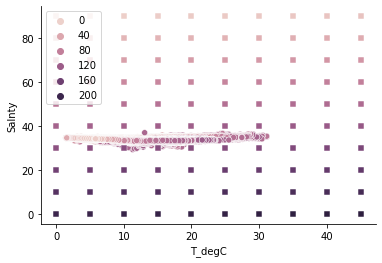

In [142]:
sns.scatterplot(x = 'T_degC', y = 'Salnty', data = bottle_lin_df, hue = 'O2Sat')

sns.scatterplot(x ='T_degC', y = 'Salnty', data = prediction_data, hue = 'O2Sat', legend = False, marker = 's')

#ax.scatter(X_train, y_train, c='cadetblue', label='Training data', alpha=0.25, s=2)
#ax.plot(X_test, y_pred, color='goldenrod', linewidth=4)
#df["loan_amount"].hist(figsize=(30,12), bins=8)
#ax.set_title("Predicting water temperature based on salinity", fontsize=20, pad=15)
#ax.set_xlabel("Temperature (\N{DEGREE SIGN}C)", fontsize=16)
#ax.set_ylabel("Salinity (%)", fontsize=16)
#ax.set_facecolor("whitesmoke")
plt.legend(loc="upper left")

plt.show()

### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

### 5.	Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

In [147]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
#Note: Outcome is the response variable; 0 and 1 correspond to negative and positive.

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45, stratify = y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [200]:
#Simplest logistic regression approach
clf = LogisticRegression(random_state=45).fit(X_train, y_train)
sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = clf.predict(X_test)

In [201]:
#clf.score(X,y)

In [202]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#print(classification_report(y_test, y_predicted))

In [203]:
#use logit 
from statsmodels.formula.api import logit
#no interaction
age_gl_no_int=logit("Outcome ~ Age + Glucose", data=diabetes_df).fit()
print(age_gl_no_int.params)

#interaction
age_gl_int=logit("Outcome ~ Age * Glucose", data=diabetes_df).fit()
print(age_gl_int.params)

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64
Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

a. The other ways to assess the performance of the model are precision, recall, and F1 score. 

* Accuracy = (true positives + true negatives)/(tp+ tn+fp+fn)


* Precision = tp/(tp + fp)


* Recall = tp/(tp + fn)


* F1score = 2* (precision x recall)/(precision + recall)

b. Recall is the best way to assess the performance of each model used on the diabetes data set. This is because it identifies both the true positives and the false negatives. Although recall ignores false positives and true negatives, meaning it can lead to overdiagnosis, it is better to overdiagnose than to underdiagnose. However, it's crucial to catch as many false negatives as possible because lack of treatment can be deadly if the patient has diabetes but received a false negative result.

### 7.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

In [50]:
from statsmodels.formula.api import ols

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
from sklearn.neighbors import KNeighborsClassifier

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 0]


In [52]:
print(knn.score(X_test, y_test))

0.7057291666666666


In [53]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       250
           1       0.66      0.33      0.44       134

    accuracy                           0.71       384
   macro avg       0.69      0.62      0.62       384
weighted avg       0.70      0.71      0.67       384

